## Start

Let's first load the dataset (which can be found [here](https://www.kaggle.com/stackoverflow/stacksample)) into pandas.

We'll start by grabbing a list of the question titles.

## Exploratory Data Analysis

In [84]:
import pandas as pd

df = (pd.read_csv("data_lang_detection/Questions.csv", nrows=1_000_000, 
                  encoding="ISO-8859-1", usecols=['Title', 'Id']))
titles = [_ for _ in df['Title']]

In [85]:
df.head(20)

,Id,Title
0,80,SQLStatement.execute() - multiple queries in o...
1,90,Good branching and merging tutorials for Torto...
2,120,ASP.NET Site Maps
3,180,Function for creating color wheels
4,260,Adding scripting functionality to .NET applica...
5,330,Should I use nested classes in this case?
6,470,Homegrown consumption of web services
7,580,Deploying SQL Server Databases from Test to Live
8,650,Automatically update version number
9,810,Visual Studio Setup Project - Per User Registr...


In [86]:
len(df)

1000000

In [87]:
len(titles)

1000000

In [88]:
import random
random.choices(titles, k=10)

['Using Gestures in Metro Apps',
 'Finalizers and Dispose',
 'TCP socket asynchronous single-thread: client connects to a server',
 'How to retrieve one record at a time from SQL Server database in MVC using button click',
 'cURL not showing up in phpinfo even though is is in php.ini',
 'Fetch a remote zip file and list the files within',
 'Are there changes in garbage collection in .NET 4.5',
 'Not able to retain the spinner data in fragment',
 'Combine SimpleXMLRPCServer and BaseHTTPRequestHandler in Python',
 'Matplotlib: Add strings as custom x-ticks but also keep existing (numeric) tick labels? Alternatives to matplotlib.pyplot.annotate?']

In [89]:
df['word_count']=df['Title'].str.split().str.len()
df.head()

,Id,Title,word_count
0,80,SQLStatement.execute() - multiple queries in o...,7
1,90,Good branching and merging tutorials for Torto...,7
2,120,ASP.NET Site Maps,3
3,180,Function for creating color wheels,5
4,260,Adding scripting functionality to .NET applica...,6


In [90]:
df['character_count']= df['Title'].str.len()
df.head()

,Id,Title,word_count,character_count
0,80,SQLStatement.execute() - multiple queries in o...,7,58
1,90,Good branching and merging tutorials for Torto...,7,53
2,120,ASP.NET Site Maps,3,17
3,180,Function for creating color wheels,5,34
4,260,Adding scripting functionality to .NET applica...,6,51


In [91]:
df['word_count'].describe()

count    1000000.000000
mean           8.399340
std            3.566737
min            1.000000
25%            6.000000
50%            8.000000
75%           10.000000
max           33.000000
Name: word_count, dtype: float64

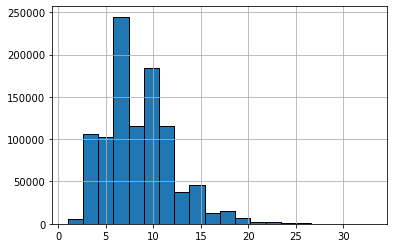

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['word_count'],bins=20,edgecolor='k')

plt.grid()
plt.show()

In [93]:
df['character_count'].describe()

count    1000000.000000
mean          51.282854
std           19.674651
min            9.000000
25%           37.000000
50%           48.000000
75%           62.000000
max          189.000000
Name: character_count, dtype: float64

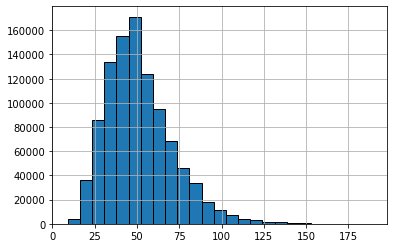

In [94]:
plt.hist(df['character_count'],bins=25,edgecolor='k')
plt.grid()
plt.show()

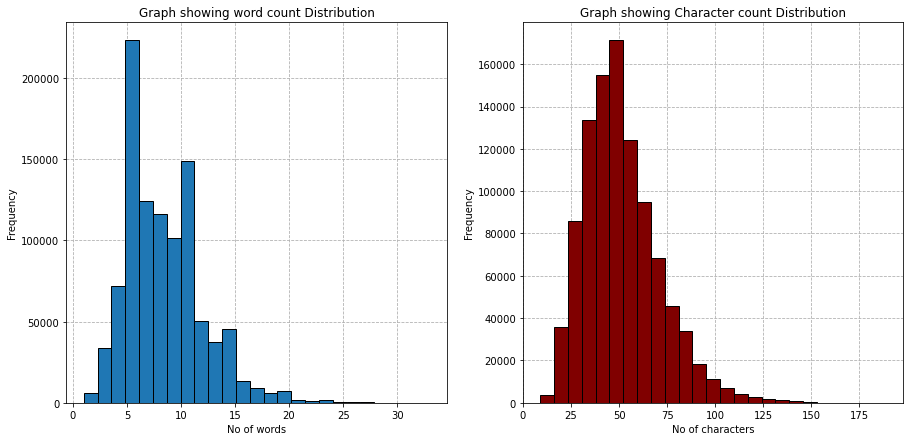

In [95]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,7))

ax1.hist(df['word_count'],bins=25,edgecolor='k')
ax1.set_title('Graph showing word count Distribution')
ax1.set_xlabel('No of words')
ax1.set_ylabel('Frequency')
ax1.set_axisbelow(True)
ax1.grid(linestyle='--')

ax2.hist(df['character_count'],bins=25,edgecolor='k',color='maroon')
ax2.set_title('Graph showing Character count Distribution')
ax2.set_xlabel('No of characters')
ax2.set_ylabel('Frequency')
ax2.set_axisbelow(True)
ax2.grid(linestyle='--')

plt.show()

In [96]:
df_tags = pd.read_csv("data_lang_detection/Tags.csv")
go_ids = df_tags.loc[lambda d: d['Tag'] == 'go']['Id']

In [97]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [98]:
len(df_tags)

3750994

In [99]:
df_tags[0:20]

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
5,90,branch
6,90,branching-and-merging
7,120,sql
8,120,asp.net
9,120,sitemap


In [100]:
df_tags['Tag'].describe()

count        3749881
unique         37034
top       javascript
freq          124155
Name: Tag, dtype: object

In [101]:
tag_count=df_tags['Tag'].value_counts()
tag_count

javascript          124155
java                115212
c#                  101186
php                  98808
android              90659
                     ...  
ibm-wcm                  1
shapado                  1
mysql-error-1264         1
unimag                   1
golfscript               1
Name: Tag, Length: 37034, dtype: int64

### Hence Javascript Tag is used maximum number of times

Text(0.5, 1.0, 'Bar graph showing tags of maximum frequency')

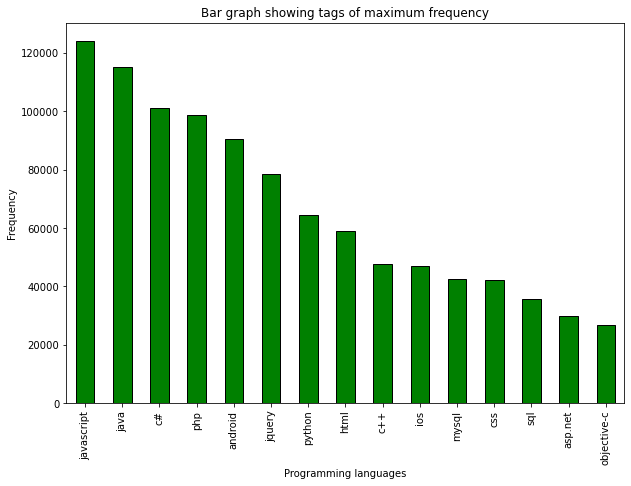

In [102]:
tag_count[:15].plot(kind='bar',figsize=(10,7),edgecolor='k',color='green')
plt.xlabel('Programming languages')
plt.ylabel('Frequency')
plt.title('Bar graph showing tags of maximum frequency')

In [103]:
merged_df = pd.merge(left=df, right=df_tags, on="Id", how="left")
merged_df

,Id,Title,word_count,character_count,Tag
0,80,SQLStatement.execute() - multiple queries in o...,7,58,flex
1,80,SQLStatement.execute() - multiple queries in o...,7,58,actionscript-3
2,80,SQLStatement.execute() - multiple queries in o...,7,58,air
3,90,Good branching and merging tutorials for Torto...,7,53,svn
4,90,Good branching and merging tutorials for Torto...,7,53,tortoisesvn
...,...,...,...,...,...
2959927,33112660,Bootstrapping to estimate the mean of a geomet...,9,56,r
2959928,33112730,Ruby: HTTP Put method,4,21,ruby
2959929,33112730,Ruby: HTTP Put method,4,21,curl
2959930,33112730,Ruby: HTTP Put method,4,21,put


In [182]:
concatenated_df = merged_df.groupby('Id')['Tag'].agg(list).reset_index()
#concatenated_df['Title']=merged_df['Title']
concatenated_df

,Id,Tag
0,80,"[flex, actionscript-3, air]"
1,90,"[svn, tortoisesvn, branch, branching-and-merging]"
2,120,"[sql, asp.net, sitemap]"
3,180,"[algorithm, language-agnostic, colors, color-s..."
4,260,"[c#, .net, scripting, compiler-construction]"
...,...,...
999995,33112570,"[android, android-ndk, gstreamer, rtsp]"
999996,33112630,"[php, mysql, apache]"
999997,33112660,[r]
999998,33112730,"[ruby, curl, put]"


In [127]:
'go' in concatenated_df['Tag'][0] #Checking

False

In [157]:
req_id=[]
for i in range(len(concatenated_df)):
    if 'go' in concatenated_df['Tag'][i]:
        req_id.append(concatenated_df['Id'][i])
    
req_id[:10]

[1724680,
 1726130,
 1727250,
 1757090,
 1766720,
 1863460,
 1976950,
 2148190,
 2270670,
 2403520]

In [159]:
len(req_id) 

1167

In [164]:
for i in range(len(concatenated_df)):
    for id in req_id[:10]:
        if concatenated_df['Id'][i]==id :
            print(concatenated_df['Id'][i],' -->\t',concatenated_df['Tag'][i])

1724680  -->	 ['benchmarking', 'go']
1726130  -->	 ['open-source', 'licensing', 'go']
1727250  -->	 ['inheritance', 'go', 'embedding']
1757090  -->	 ['shared-libraries', 'go']
1766720  -->	 ['makefile', 'go']
1863460  -->	 ['pointers', 'go']
1976950  -->	 ['networking', 'tcp', 'go']
2148190  -->	 ['go']
2270670  -->	 ['sockets', 'go']
2403520  -->	 ['regex', 'json', 'data-structures', 'map', 'go']


In [165]:
len(concatenated_df) 

1000000

In [178]:
print('Percentage of sentences with GO lang: ',1167/10000)

Percentage of sentences with GO lang:  0.1167


# *******************************************

In [137]:
go_ids

98267       1724680
98367       1726130
98457       1727250
100482      1757090
101172      1766720
             ...   
3746985    40110670
3747206    40112250
3748186    40120850
3750374    40138660
3750837    40142060
Name: Id, Length: 1858, dtype: int64

In [138]:
# Printing df_tag for ids in go_ids
df_tags.iloc[98267]

Id     1724680
Tag         go
Name: 98267, dtype: object

In [139]:
len(go_ids)

1858

In [24]:
def has_golang(text):
    return " go " in text

g = (title for title in titles if has_golang(title))
[next(g) for i in range(2)]

['Where does Console.WriteLine go in ASP.NET?',
 'Should try...catch go inside or outside a loop?']

In [25]:
type(g)

generator

It doesn't work too well. So let us try spacy first. You might need to install the language model first.

```
python -m spacy download en_core_web_sm
```

In [26]:
import spacy 

nlp = spacy.load("en_core_web_sm")

Let's first see how it works.

In [27]:
[t for t in nlp("My name is Vincent.")]

[My, name, is, Vincent, .]

In [28]:
doc = nlp("My name is Vincent.")

In [29]:
t = doc[0]
t

My

In [30]:
type(doc)

spacy.tokens.doc.Doc

In [31]:
type(t)

spacy.tokens.token.Token

In [32]:
from spacy import displacy

displacy.render(doc)

In [33]:
for t in nlp("Where does Console.WriteLine go in ASP.NET?"):
    print(t, t.pos_, t.dep_)

Where ADV advmod
does AUX ROOT
Console PROPN nsubj
. PUNCT punct
WriteLine PROPN nsubj
go VERB ROOT
in ADP prep
ASP.NET PROPN pobj
? PUNCT punct


# Back to Detecting Golang

Let's now use it one more time for our problem of detecting the `go` language. I'll also go ahead and write the code in a more performant way.

In [34]:
nlp = spacy.load("en_core_web_sm")

In [35]:
df = (pd.read_csv("data_lang_detection/Questions.csv", nrows=2_000_000, 
                  encoding="ISO-8859-1", usecols=['Title', 'Id']))

go_titles = [_ for _ in df.loc[lambda d: d['Title'].str.lower().str.contains("go")]['Title']]

In [36]:
len(df)

1264216

In [37]:
len(go_titles)

49589

In [38]:
go_titles[0:20]

['Good branching and merging tutorials for TortoiseSVN?',
 'Good STL-like library for C',
 'My website got hacked... What should I do?',
 "DVCS Choices - What's good for Windows?",
 'Is a "Confirm Email" input good practice when user changes email address?',
 'Any good advice on using emacs for C++ project?',
 'What is a good way to denormalize a mysql database?',
 'Is AnkhSVN any good?',
 'Arguments for going open source',
 'Does Hostmonster support Django',
 "What's a good way to check if two datetimes are on the same calendar day in TSQL?",
 'Good strategy for leaving an audit trail/change history for DB applications?',
 'Factorial Algorithms in different languages',
 'What is a good dvd burning component for Windows or .Net?',
 'Best .NET Wrapper for Google Maps or Yahoo Maps?',
 'Is there a best .NET algorithm for credit card encryption?',
 'How to generate urls in django',
 'Suggest some good MVC framework in perl',
 'Is there a good Fogbugz client for Mac OS X?',
 'What are some

In [39]:
# to increase Performance: ner is disabled
nlp = spacy.load("en_core_web_sm", disable=["ner"])

In [40]:
'''%%time

def has_golang(doc):
    for t in doc:
        if t.lower_ in ["go", "golang"]:
            if t.pos_ == "NOUN":
                return True 
    return False

g = (doc for doc in nlp.pipe(titles) if has_golang(doc))
[next(g) for i in range(30)]'''

'%%time\n\ndef has_golang(doc):\n    for t in doc:\n        if t.lower_ in ["go", "golang"]:\n            if t.pos_ == "NOUN":\n                return True \n    return False\n\ng = (doc for doc in nlp.pipe(titles) if has_golang(doc))\n[next(g) for i in range(30)]'

This works! Now let's write some pandas code that will help us with our benchmarks.

![](spacy-youtube-material/images/these-2.png)

### Some tags have same ID!!!

In [41]:
all_go_sentences = df.loc[lambda d: d['Id'].isin(go_ids)]['Title'].tolist()

In [42]:
def has_go_token(doc):
    for t in doc:
        if t.lower_ in ['go', 'golang']:
            if t.pos_ != 'VERB':
                return True
    return False


In [43]:
all_go_sentences[0:20] # All sentences that have tag GO

['Go language benchmarks?',
 'Go code contribution: license and patent implications?',
 'Embedding instead of inheritance in Go',
 'Shared library in Go?',
 'multi package makefile example for go',
 "What's the point of having pointers in Go?",
 'Simulate a tcp connection in Go',
 'exec.Run and argv problem',
 'Trouble reading from a socket in go',
 "basic json > struct question ( using 'Go')",
 "Google's 'go' and scope/functions",
 'How does Go compile so quickly?',
 "For a struct vertex, what's the difference between map[int]vertex and map[int]*vertex?",
 'More idiomatic way of adding channel result to queue on completion',
 'Reading utf8-encoded data from a connection, using Go',
 'Checking if a channel has a ready-to-read value, using Go',
 "What does it mean by a 'systems language'?",
 'Convert string to integer type in Go?',
 'Install Google GO Language',
 'Is there any automated conversion from Go to Python?']

In [44]:
#sentences of go that we need
detectable = [d.text for d in nlp.pipe(all_go_sentences) if has_go_token(d)]

In [45]:
detectable[0:20]

['Embedding instead of inheritance in Go',
 'Shared library in Go?',
 'multi package makefile example for go',
 "What's the point of having pointers in Go?",
 'Simulate a tcp connection in Go',
 'Trouble reading from a socket in go',
 "Google's 'go' and scope/functions",
 'Convert string to integer type in Go?',
 'Install Google GO Language',
 'Implementing the â\x80\x98deferâ\x80\x99 statement from Go in Objective-C?',
 "what's the state of go language IDE support?",
 'Generating Random Numbers in Go',
 'making generic algorithms in go',
 'How do I allocate memory for an array in the go programming language?',
 'In Go, one type is coerced into another, can a method to determine the type of the receiver?',
 'Is message passing via channels in go guaranteed to be non-blocking?',
 'The maximum value for an int type in Go',
 'Do Sets exist in Go? (like in Python)',
 'Usage of interface in Go',
 'Google Go: Why does the http server package not serve more than 5 simultaneous requests?']

In [46]:
non_detectable = (df
                  .loc[lambda d: ~d['Id'].isin(go_ids)]
                  .loc[lambda d: d['Title'].str.lower().str.contains("go")]
                  ['Title']
                  .tolist())
# sentences that have 'go' in them but are not tagged by GO + satisfy our condition of has_go_token
non_detectable = [d.text for d in nlp.pipe(non_detectable) if has_go_token(d)]

KeyboardInterrupt: 

In [ ]:
non_detectable[0:20]

In [ ]:
len(all_go_sentences), len(detectable), len(non_detectable)

Nice, we get some numbers that can result in a meaningful benchmark.

We can calculate precision/recall like stats by running the code below. You can put a forloop around it if you want but as it is you can fiddle around with the `has_go_token` function to see how well it performs.

In [ ]:
model_name = "en_core_web_sm"
model = spacy.load(model_name, disable=["ner"])

def has_go_token(doc):
    for t in doc:
        if t.lower_ in ["go", "golang"]:
            if t.pos_ != "VERB":
                return True
    return False

method = "not-verb-but-pobj"

In [ ]:
correct = sum(has_go_token(doc) for doc in model.pipe(detectable))
wrong = sum(has_go_token(doc) for doc in model.pipe(non_detectable))
precision = correct/(correct + wrong)
recall = correct/len(detectable)
accuracy = (correct + len(non_detectable) - wrong)/(len(detectable) + len(non_detectable))

f"{precision},{recall},{accuracy},{model_name},{method}" # this is logged

In [ ]:
correct_sen=[has_go_token(doc) for doc in model.pipe(detectable)]
#correct_sen

In [ ]:
len(correct_sen)

In [ ]:
len(detectable)

## Therefore detectable has the intersection portion of venn digram (This is what we want to detect)

In [ ]:
wrong_sen = [has_go_token(doc) for doc in model.pipe(non_detectable)]
len(wrong_sen)

In [ ]:
len(non_detectable)

## Non detectable is the right circle minus the intersection portion of venn diagram